Presentado por:<br>
David Crespo <br>
Cristina Mejia <br>
Melissa Fuentes <br>

El objeto de este proyecto es alicar los conceptos de aprendizaje de máquina vistos en el curso. Se hará el entrenamiento de modelos de clasificación usando árboles de decisión, naive bayes y redes neuronales para resolver un problema de clasificación a partir de un conjunto de datos relacionados a enfermedades del corazón.


Primero se importan las librerías:

In [138]:
import numpy as np
import sklearn
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers.core import Dense
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz

Ahora cargamos los dos archivos de conjuntos de datos.

In [139]:
heartDataCSV = pd.read_csv("../input/heart-disease-uci/heart.csv")
#heartDiseaseData = pd.read_csv("HeartDisease.csv")

print(heartDataCSV.columns)

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')


Se convierten los datos en un dataFrame de Pandas

In [140]:
heartData = pd.DataFrame(heartDataCSV)

Histogramas

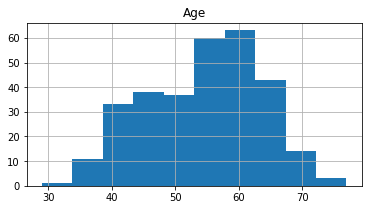

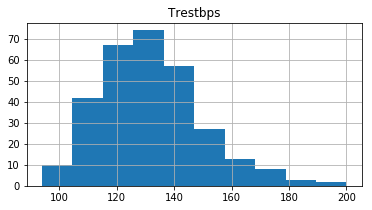

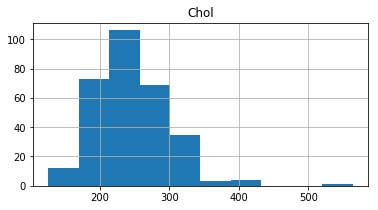

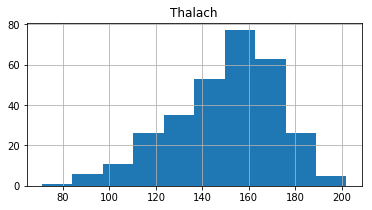

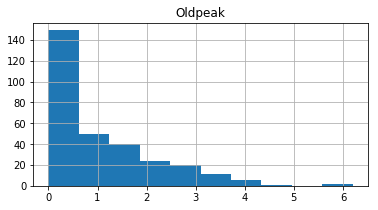

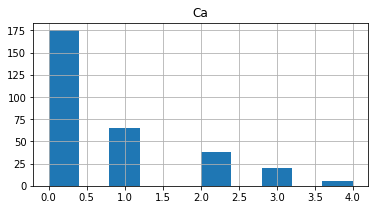

In [141]:


heartData["age"].hist(figsize=(6,3))
plt.title('Age')
plt.show()
heartData["trestbps"].hist(figsize=(6,3))
plt.title('Trestbps')
plt.show()
heartData["chol"].hist(figsize=(6,3))
plt.title('Chol')
plt.show()
heartData["thalach"].hist(figsize=(6,3))
plt.title('Thalach')
plt.show()
heartData["oldpeak"].hist(figsize=(6,3))
plt.title('Oldpeak')
plt.show()
heartData["ca"].hist(figsize=(6,3))
plt.title('Ca')
plt.show()



In [142]:
sums = heartData.sex.sum()
print(sums)

207


Diagramas de pastel

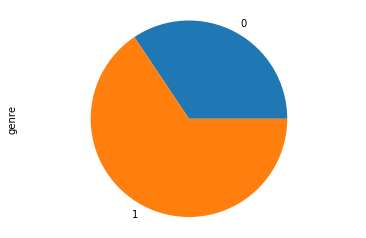

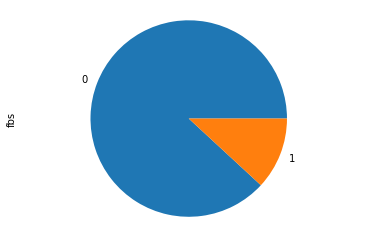

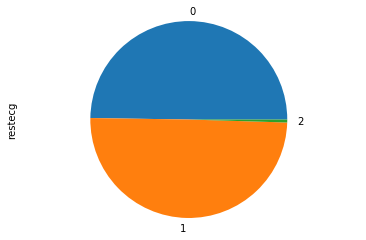

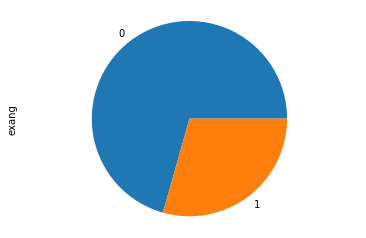

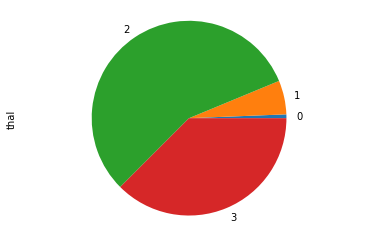

In [143]:
heartData.restecg.groupby(heartData.sex).sum().plot(kind = 'pie')
plt.axis('equal')
plt.ylabel('genre')
plt.show()
heartData.restecg.groupby(heartData.fbs).sum().plot(kind = 'pie')
plt.axis('equal')
plt.ylabel('fbs')
plt.show()
heartData.sex.groupby(heartData.restecg).sum().plot(kind = 'pie')
plt.axis('equal')
plt.ylabel('restecg')
plt.show()
heartData.restecg.groupby(heartData.exang).sum().plot(kind = 'pie')
plt.axis('equal')
plt.ylabel('exang')
plt.show()
heartData.restecg.groupby(heartData.thal).sum().plot(kind = 'pie')
plt.axis('equal')
plt.ylabel('thal')
plt.show()


**Organización de conjunto de datos**

A continuación se analaizará el conjunto de datos para considerar si hace falta completar o remover elementos faltantes o nulos

In [144]:
#Punto 5 en el que miramos si hay valores nulos o faltantes en nuestro conjunto de datos
heartDataCSV = pd.read_csv("../input/heart-disease-uci/heart.csv")
x = pd.notnull(heartDataCSV)  
heartDataCSV[x]

#Gracias a la función notnull, podemos mostrar todo nuestro conjunto de datos cuya celda sea distinta de NaN, y como nos retorna las 303 filas en total con las 14 columnas, podemos decir que nuestro conjunto de datos no tenia regitros faltantes


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1




Gracias a la función notnull, podemos mostrar todo nuestro conjunto de datos cuya celda sea distinta de NaN, y como nos retorna las 303 filas en total con las 14 columnas, podemos decir que nuestro conjunto de datos no tenia regitros faltantes, por lo que concluimos que no hubo necesidad de realizar ninguna modificación al conjunto de datos.

Ahora a continuación partiremos los datos en dos grupos. El 80% de ellos para entrenamiento y el 20% para pruebas.


In [145]:
from sklearn.model_selection import train_test_split


# Create a new array with the added features: features_two
variables = heartData[['age','sex','cp','trestbps', 'chol', 'fbs', 'restecg',
                      'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']].values
target = heartData['target'].values


# Split the data into train and test
trainX, testX, trainY, testY = train_test_split(variables, target, test_size=0.2)
print(trainX.shape, trainY.shape)
print(testX.shape, testY.shape)

(242, 13) (242,)
(61, 13) (61,)


**Naive Bayes**

In [146]:
#Entrenamos un modelo de Naive Bayes

from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix


gnb = GaussianNB()

modeloBayes = gnb.fit(trainX, trainY)

#Mostramos el score del nuevo arbol de desición 
print("Exactitud en el entrenamiento")
print(modeloBayes.score(trainX, trainY))

print("Exactitud en la prueba")
print(modeloBayes.score(testX, testY))

#Mostramos la matriz de confusión para el modelo 
confusion_matrix(modeloBayes.predict(testX), testY)


Exactitud en el entrenamiento
0.8429752066115702
Exactitud en la prueba
0.8032786885245902


array([[20, 10],
       [ 2, 29]])


**Árboles de decisión**

In [147]:
#Arbolito bonito

arbol = DecisionTreeClassifier(max_depth = 4, min_samples_split =4)
arbol.fit(trainX, trainY)

#Print the score on the train data
print(arbol.score(trainX, trainY))
#Print the score on the test data
print(arbol.score(testX, testY))

0.8966942148760331
0.7377049180327869


In [148]:
export_graphviz(arbol, out_file='arbol.dot',impurity=False, filled=True)

In [149]:
import pydotplus
from IPython.display import Image

pydot_graph = pydotplus.graph_from_dot_file("arbol.dot")
Image(pydot_graph.create_png())


ModuleNotFoundError: No module named 'pydotplus'

In [150]:
#Matriz de confusión
from sklearn.metrics import confusion_matrix

confusion_matrix(arbol.predict(testX), testY)

**Red neuronal**

Utilizaremos numpy para el manejo de arrays de Keras, se importa el  modelo Sequential y la capa Dense

Creamos los arrays de entrada seran trainX y trainY

In [151]:
model = Sequential()
model.add(Dense(16, input_dim=13, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

se crea un modelo vació de tipo Sequential, esto quiere decir que crearemos una serie de capas

Con esto indicamos el tipo de pérdida (loss) que utilizaremos, el «optimizador» de los pesos de las conexiones de las neuronas y las métricas que queremos obtener.

Indicamos con model.fit() las entradas y sus salidas y la cantidad de iteraciones de 

In [152]:

 
model.compile(loss='mean_squared_error',
              optimizer='adam',
              metrics=['binary_accuracy'])
 
model.fit(trainX, trainY, epochs=1000)
 
# evaluamos el modelo
scores = model.evaluate(testX, testY)
 
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
print (model.evaluate(trainX,trainY))

#Mostramos la matriz de confusión para el modelo 
confusion_matrix(model.predict_classes(testX), testY)

Epoch 1/1000
242/242 [==============================] - 1s 2ms/step - loss: 0.5110 - binary_accuracy: 0.4835
Epoch 2/1000
242/242 [==============================] - 0s 55us/step - loss: 0.3972 - binary_accuracy: 0.5537
Epoch 3/1000
242/242 [==============================] - 0s 70us/step - loss: 0.2753 - binary_accuracy: 0.6446
Epoch 4/1000
242/242 [==============================] - 0s 59us/step - loss: 0.2909 - binary_accuracy: 0.6240
Epoch 5/1000
242/242 [==============================] - 0s 62us/step - loss: 0.2616 - binary_accuracy: 0.6736
Epoch 6/1000
242/242 [==============================] - 0s 66us/step - loss: 0.2594 - binary_accuracy: 0.6777
Epoch 7/1000
242/242 [==============================] - 0s 58us/step - loss: 0.2514 - binary_accuracy: 0.6901
Epoch 8/1000
242/242 [==============================] - 0s 56us/step - loss: 0.2486 - binary_accuracy: 0.7066
Epoch 9/1000
242/242 [==============================] - 0s 59us/step - loss: 0.2481 - binary_accuracy: 0.7107
Epoch 10/10

242/242 [==============================] - 0s 62us/step - loss: 0.2117 - binary_accuracy: 0.7314
Epoch 75/1000
242/242 [==============================] - 0s 61us/step - loss: 0.2057 - binary_accuracy: 0.7438
Epoch 76/1000
242/242 [==============================] - 0s 58us/step - loss: 0.2102 - binary_accuracy: 0.7479
Epoch 77/1000
242/242 [==============================] - 0s 62us/step - loss: 0.2103 - binary_accuracy: 0.7397
Epoch 78/1000
242/242 [==============================] - 0s 57us/step - loss: 0.2101 - binary_accuracy: 0.7314
Epoch 79/1000
242/242 [==============================] - 0s 59us/step - loss: 0.2064 - binary_accuracy: 0.7397
Epoch 80/1000
242/242 [==============================] - 0s 64us/step - loss: 0.2069 - binary_accuracy: 0.7479
Epoch 81/1000
242/242 [==============================] - 0s 62us/step - loss: 0.2035 - binary_accuracy: 0.7479
Epoch 82/1000
242/242 [==============================] - 0s 59us/step - loss: 0.2025 - binary_accuracy: 0.7521
Epoch 83/1000
2

242/242 [==============================] - 0s 61us/step - loss: 0.1572 - binary_accuracy: 0.7727
Epoch 148/1000
242/242 [==============================] - 0s 56us/step - loss: 0.1515 - binary_accuracy: 0.7893
Epoch 149/1000
242/242 [==============================] - 0s 62us/step - loss: 0.1497 - binary_accuracy: 0.7934
Epoch 150/1000
242/242 [==============================] - 0s 58us/step - loss: 0.1513 - binary_accuracy: 0.7975
Epoch 151/1000
242/242 [==============================] - 0s 61us/step - loss: 0.1493 - binary_accuracy: 0.7934
Epoch 152/1000
242/242 [==============================] - 0s 60us/step - loss: 0.1503 - binary_accuracy: 0.7893
Epoch 153/1000
242/242 [==============================] - 0s 58us/step - loss: 0.1529 - binary_accuracy: 0.7810
Epoch 154/1000
242/242 [==============================] - 0s 55us/step - loss: 0.1504 - binary_accuracy: 0.7851
Epoch 155/1000
242/242 [==============================] - 0s 62us/step - loss: 0.1495 - binary_accuracy: 0.7769
Epoch 1

242/242 [==============================] - 0s 56us/step - loss: 0.1096 - binary_accuracy: 0.8512
Epoch 221/1000
242/242 [==============================] - 0s 65us/step - loss: 0.1137 - binary_accuracy: 0.8554
Epoch 222/1000
242/242 [==============================] - 0s 66us/step - loss: 0.1104 - binary_accuracy: 0.8388
Epoch 223/1000
242/242 [==============================] - 0s 58us/step - loss: 0.1096 - binary_accuracy: 0.8512
Epoch 224/1000
242/242 [==============================] - 0s 56us/step - loss: 0.1127 - binary_accuracy: 0.8306
Epoch 225/1000
242/242 [==============================] - 0s 58us/step - loss: 0.1087 - binary_accuracy: 0.8595
Epoch 226/1000
242/242 [==============================] - 0s 54us/step - loss: 0.1076 - binary_accuracy: 0.8595
Epoch 227/1000
242/242 [==============================] - 0s 57us/step - loss: 0.1083 - binary_accuracy: 0.8554
Epoch 228/1000
242/242 [==============================] - 0s 60us/step - loss: 0.1096 - binary_accuracy: 0.8430
Epoch 2

242/242 [==============================] - 0s 60us/step - loss: 0.1038 - binary_accuracy: 0.8554
Epoch 294/1000
242/242 [==============================] - 0s 68us/step - loss: 0.1028 - binary_accuracy: 0.8678
Epoch 295/1000
242/242 [==============================] - 0s 60us/step - loss: 0.1019 - binary_accuracy: 0.8678
Epoch 296/1000
242/242 [==============================] - 0s 64us/step - loss: 0.1005 - binary_accuracy: 0.8678
Epoch 297/1000
242/242 [==============================] - 0s 65us/step - loss: 0.1024 - binary_accuracy: 0.8471
Epoch 298/1000
242/242 [==============================] - 0s 60us/step - loss: 0.1034 - binary_accuracy: 0.8719
Epoch 299/1000
242/242 [==============================] - 0s 68us/step - loss: 0.1025 - binary_accuracy: 0.8719
Epoch 300/1000
242/242 [==============================] - 0s 73us/step - loss: 0.1024 - binary_accuracy: 0.8719
Epoch 301/1000
242/242 [==============================] - 0s 68us/step - loss: 0.1043 - binary_accuracy: 0.8554
Epoch 3

242/242 [==============================] - 0s 73us/step - loss: 0.0977 - binary_accuracy: 0.8719
Epoch 367/1000
242/242 [==============================] - 0s 58us/step - loss: 0.0971 - binary_accuracy: 0.8678
Epoch 368/1000
242/242 [==============================] - 0s 58us/step - loss: 0.0994 - binary_accuracy: 0.8678
Epoch 369/1000
242/242 [==============================] - 0s 54us/step - loss: 0.0998 - binary_accuracy: 0.8595
Epoch 370/1000
242/242 [==============================] - 0s 56us/step - loss: 0.0976 - binary_accuracy: 0.8719
Epoch 371/1000
242/242 [==============================] - 0s 64us/step - loss: 0.0976 - binary_accuracy: 0.8678
Epoch 372/1000
242/242 [==============================] - 0s 75us/step - loss: 0.0977 - binary_accuracy: 0.8678
Epoch 373/1000
242/242 [==============================] - 0s 58us/step - loss: 0.0970 - binary_accuracy: 0.8678
Epoch 374/1000
242/242 [==============================] - 0s 72us/step - loss: 0.0975 - binary_accuracy: 0.8636
Epoch 3

242/242 [==============================] - 0s 55us/step - loss: 0.0972 - binary_accuracy: 0.8719
Epoch 440/1000
242/242 [==============================] - 0s 52us/step - loss: 0.1041 - binary_accuracy: 0.8512
Epoch 441/1000
242/242 [==============================] - 0s 57us/step - loss: 0.1147 - binary_accuracy: 0.8182
Epoch 442/1000
242/242 [==============================] - 0s 56us/step - loss: 0.1058 - binary_accuracy: 0.8554
Epoch 443/1000
242/242 [==============================] - 0s 64us/step - loss: 0.1059 - binary_accuracy: 0.8512
Epoch 444/1000
242/242 [==============================] - 0s 59us/step - loss: 0.1008 - binary_accuracy: 0.8512
Epoch 445/1000
242/242 [==============================] - 0s 68us/step - loss: 0.0934 - binary_accuracy: 0.8719
Epoch 446/1000
242/242 [==============================] - 0s 69us/step - loss: 0.0959 - binary_accuracy: 0.8678
Epoch 447/1000
242/242 [==============================] - 0s 62us/step - loss: 0.0959 - binary_accuracy: 0.8719
Epoch 4

242/242 [==============================] - 0s 60us/step - loss: 0.1025 - binary_accuracy: 0.8512
Epoch 513/1000
242/242 [==============================] - 0s 68us/step - loss: 0.0993 - binary_accuracy: 0.8512
Epoch 514/1000
242/242 [==============================] - 0s 59us/step - loss: 0.0949 - binary_accuracy: 0.8802
Epoch 515/1000
242/242 [==============================] - 0s 65us/step - loss: 0.0924 - binary_accuracy: 0.8678
Epoch 516/1000
242/242 [==============================] - 0s 63us/step - loss: 0.0954 - binary_accuracy: 0.8636
Epoch 517/1000
242/242 [==============================] - 0s 63us/step - loss: 0.0946 - binary_accuracy: 0.8884
Epoch 518/1000
242/242 [==============================] - 0s 64us/step - loss: 0.0978 - binary_accuracy: 0.8719
Epoch 519/1000
242/242 [==============================] - 0s 61us/step - loss: 0.0931 - binary_accuracy: 0.8760
Epoch 520/1000
242/242 [==============================] - 0s 55us/step - loss: 0.0937 - binary_accuracy: 0.8802
Epoch 5

242/242 [==============================] - 0s 61us/step - loss: 0.0907 - binary_accuracy: 0.8802
Epoch 586/1000
242/242 [==============================] - 0s 70us/step - loss: 0.0936 - binary_accuracy: 0.8843
Epoch 587/1000
242/242 [==============================] - 0s 63us/step - loss: 0.0934 - binary_accuracy: 0.8636
Epoch 588/1000
242/242 [==============================] - 0s 66us/step - loss: 0.0915 - binary_accuracy: 0.8802
Epoch 589/1000
242/242 [==============================] - 0s 65us/step - loss: 0.0906 - binary_accuracy: 0.8719
Epoch 590/1000
242/242 [==============================] - 0s 62us/step - loss: 0.0926 - binary_accuracy: 0.8636
Epoch 591/1000
242/242 [==============================] - 0s 62us/step - loss: 0.0927 - binary_accuracy: 0.8719
Epoch 592/1000
242/242 [==============================] - 0s 59us/step - loss: 0.0921 - binary_accuracy: 0.8760
Epoch 593/1000
242/242 [==============================] - 0s 65us/step - loss: 0.0936 - binary_accuracy: 0.8678
Epoch 5

242/242 [==============================] - 0s 60us/step - loss: 0.0929 - binary_accuracy: 0.8760
Epoch 659/1000
242/242 [==============================] - 0s 56us/step - loss: 0.0913 - binary_accuracy: 0.8719
Epoch 660/1000
242/242 [==============================] - 0s 60us/step - loss: 0.0938 - binary_accuracy: 0.8760
Epoch 661/1000
242/242 [==============================] - 0s 60us/step - loss: 0.0976 - binary_accuracy: 0.8636
Epoch 662/1000
242/242 [==============================] - 0s 52us/step - loss: 0.0926 - binary_accuracy: 0.8802
Epoch 663/1000
242/242 [==============================] - 0s 62us/step - loss: 0.0900 - binary_accuracy: 0.8802
Epoch 664/1000
242/242 [==============================] - 0s 55us/step - loss: 0.0903 - binary_accuracy: 0.8926
Epoch 665/1000
242/242 [==============================] - 0s 52us/step - loss: 0.0891 - binary_accuracy: 0.8843
Epoch 666/1000
242/242 [==============================] - 0s 51us/step - loss: 0.0898 - binary_accuracy: 0.8884
Epoch 6

242/242 [==============================] - 0s 58us/step - loss: 0.0889 - binary_accuracy: 0.8802
Epoch 732/1000
242/242 [==============================] - 0s 72us/step - loss: 0.0906 - binary_accuracy: 0.8843
Epoch 733/1000
242/242 [==============================] - 0s 62us/step - loss: 0.0880 - binary_accuracy: 0.8843
Epoch 734/1000
242/242 [==============================] - 0s 61us/step - loss: 0.0960 - binary_accuracy: 0.8802
Epoch 735/1000
242/242 [==============================] - 0s 61us/step - loss: 0.0876 - binary_accuracy: 0.8884
Epoch 736/1000
242/242 [==============================] - 0s 62us/step - loss: 0.0885 - binary_accuracy: 0.8884
Epoch 737/1000
242/242 [==============================] - 0s 73us/step - loss: 0.0896 - binary_accuracy: 0.8802
Epoch 738/1000
242/242 [==============================] - 0s 68us/step - loss: 0.0872 - binary_accuracy: 0.8926
Epoch 739/1000
242/242 [==============================] - 0s 60us/step - loss: 0.0891 - binary_accuracy: 0.8802
Epoch 7

242/242 [==============================] - 0s 59us/step - loss: 0.0870 - binary_accuracy: 0.8926
Epoch 805/1000
242/242 [==============================] - 0s 59us/step - loss: 0.0862 - binary_accuracy: 0.8967
Epoch 806/1000
242/242 [==============================] - 0s 69us/step - loss: 0.0880 - binary_accuracy: 0.8884
Epoch 807/1000
242/242 [==============================] - 0s 61us/step - loss: 0.0893 - binary_accuracy: 0.8843
Epoch 808/1000
242/242 [==============================] - 0s 58us/step - loss: 0.0887 - binary_accuracy: 0.8760
Epoch 809/1000
242/242 [==============================] - 0s 59us/step - loss: 0.0861 - binary_accuracy: 0.8967
Epoch 810/1000
242/242 [==============================] - 0s 61us/step - loss: 0.0926 - binary_accuracy: 0.8802
Epoch 811/1000
242/242 [==============================] - 0s 61us/step - loss: 0.0897 - binary_accuracy: 0.8760
Epoch 812/1000
242/242 [==============================] - 0s 59us/step - loss: 0.0863 - binary_accuracy: 0.8926
Epoch 8

242/242 [==============================] - 0s 68us/step - loss: 0.0853 - binary_accuracy: 0.8843
Epoch 878/1000
242/242 [==============================] - 0s 59us/step - loss: 0.0863 - binary_accuracy: 0.8843
Epoch 879/1000
242/242 [==============================] - 0s 58us/step - loss: 0.0872 - binary_accuracy: 0.8884
Epoch 880/1000
242/242 [==============================] - 0s 54us/step - loss: 0.0855 - binary_accuracy: 0.8843
Epoch 881/1000
242/242 [==============================] - 0s 63us/step - loss: 0.0859 - binary_accuracy: 0.8843
Epoch 882/1000
242/242 [==============================] - 0s 57us/step - loss: 0.0866 - binary_accuracy: 0.8802
Epoch 883/1000
242/242 [==============================] - 0s 69us/step - loss: 0.0837 - binary_accuracy: 0.9050
Epoch 884/1000
242/242 [==============================] - 0s 72us/step - loss: 0.0886 - binary_accuracy: 0.8843
Epoch 885/1000
242/242 [==============================] - 0s 74us/step - loss: 0.0881 - binary_accuracy: 0.8843
Epoch 8

242/242 [==============================] - 0s 75us/step - loss: 0.0848 - binary_accuracy: 0.8884
Epoch 951/1000
242/242 [==============================] - 0s 68us/step - loss: 0.0845 - binary_accuracy: 0.8967
Epoch 952/1000
242/242 [==============================] - 0s 68us/step - loss: 0.0847 - binary_accuracy: 0.8926
Epoch 953/1000
242/242 [==============================] - 0s 66us/step - loss: 0.0849 - binary_accuracy: 0.8884
Epoch 954/1000
242/242 [==============================] - 0s 62us/step - loss: 0.0855 - binary_accuracy: 0.8884
Epoch 955/1000
242/242 [==============================] - 0s 56us/step - loss: 0.0856 - binary_accuracy: 0.8843
Epoch 956/1000
242/242 [==============================] - 0s 68us/step - loss: 0.0957 - binary_accuracy: 0.8678
Epoch 957/1000
242/242 [==============================] - 0s 63us/step - loss: 0.0907 - binary_accuracy: 0.8802
Epoch 958/1000
242/242 [==============================] - 0s 63us/step - loss: 0.0892 - binary_accuracy: 0.8967
Epoch 9

array([[16,  8],
       [ 6, 31]])

al finalizar, los resultados permite ver el nivel de acierto de la primera y segunda iteración 

Luego en la «epoch» se hacen los ajustes correspondientes a la red

